# Regression


In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import time

In [195]:
def mean(feature):
    n = len(feature)
    return(sum(feature)/n)

In [196]:
def std(feature, mean):
    n = len(feature)
    diff = [0]*n
    for i in range(n):
        diff[i] = (feature[i] - mean)**2
    
    return(((sum(diff)/(n-1))**0.5))

In [197]:
def normalise (feature, mean, std):
    return((feature - mean)/std)

In [198]:
file1 = open("ex1data2.txt","r")
lines = file1.readlines()

n = len(lines)

In [199]:
sq_feet = [0]*n
rooms = [0]*n
price = [0]*n

In [200]:
for i in range(n):
    content = lines[i].split(",")
    sq_feet[i] = int(content[0])
    rooms[i] = int(content[1])
    price[i] = int(content[2])

In [201]:
mean_sq_feet = mean(sq_feet)
mean_rooms = mean(rooms)
mean_price = mean(price)

std_sq_feet = std(sq_feet, mean_sq_feet)
std_rooms = std(rooms, mean_rooms)
std_price = std(price, mean_price)

In [202]:
for i in range(n):
    sq_feet[i] = normalise(sq_feet[i], mean_sq_feet, std_sq_feet)
    rooms[i] = normalise(rooms[i], mean_rooms, std_rooms)


## Gradient Descent

In [207]:
w0 = 0
w1 = 0
w2 = 0

learning_rate = 0.1
epoch = 75
costfn = [0]*epoch

In [208]:
for i in range(epoch):
    del_costfnBydel_w0 = 0
    del_costfnBydel_w1 = 0
    del_costfnBydel_w2= 0
    
    for j in range(n):
        y_pred = w0 + (w1*sq_feet[j]) + (w2*rooms[j])
        costfn[i] += (y_pred - price[j])**2
        del_costfnBydel_w0 += (y_pred - price[j])
        del_costfnBydel_w1 += (sq_feet[j]*(y_pred - price[j]))
        del_costfnBydel_w2 += (rooms[j]*(y_pred- price[j]))
        
        
    w0 += -learning_rate*(del_costfnBydel_w0/n)
    w1 += -learning_rate*(del_costfnBydel_w1/n)
    w2 += -learning_rate*(del_costfnBydel_w2/n)


# Iteration diagram

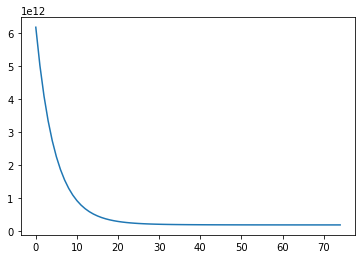

In [209]:
Iter = list(range(epoch))
plt.plot(Iter, costfn)
plt.show()

# Testing

In [212]:
# Give you input here
sqfeet = 2000
room = 3


nor_sqfeet = normalise(sqfeet, mean_sq_feet, std_sq_feet)
nor_rooms = normalise(room, mean_rooms, std_rooms)
predicted_price = w0 + (w1*nor_sqfeet) + (w2*nor_rooms)
print(predicted_price)

191055.52309915825
